In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the necessary libraries

In [ ]:
!pip install doclayout-yolo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 711.2/711.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from transformers import ViTModel, AutoTokenizer
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import cv2
from doclayout_yolo import YOLOv10
from PIL import Image
import matplotlib.pyplot as plt

# Document Structure Extraction
### Import model from huggingface



In [ ]:
model_pth = '/content/drive/MyDrive/HandwritingRecog/doclayout_yolo_docstructbench_imgsz1024.pt'
doc_str_model = YOLOv10(model_pth)

### Show example


image 1/1 /content/drive/MyDrive/ArabicHandwritingRecog/app_doc.png: 576x1024 1 title, 4 abandons, 1 figure, 1 table, 106.1ms
Speed: 5.8ms preprocess, 106.1ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 1024)


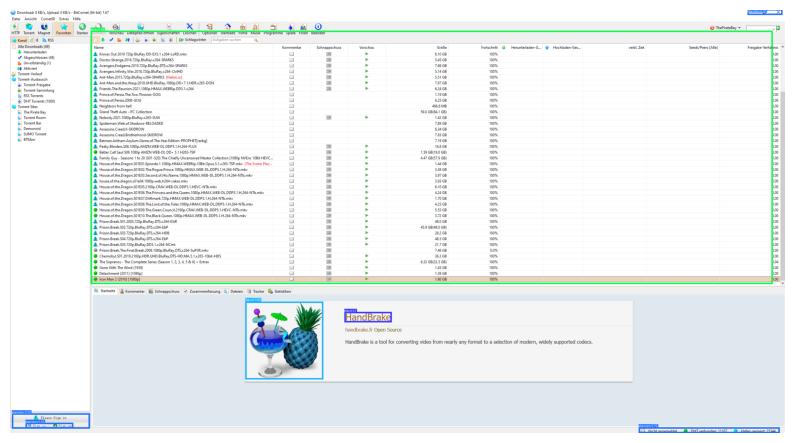

In [ ]:
image_path_test = '/content/drive/MyDrive/HandwritingRecog/app_doc.png'
det_res_test = doc_str_model.predict(
    image_path_test,   # Image to predict
    imgsz=1024,   # Prediction image size
    conf=0.2,     # Confidence threshold
    device='cuda:0'  # Use GPU for inference
)

annotated_image_test = det_res_test[0].plot(pil=True, line_width=5, font_size=20)

img = Image.fromarray(annotated_image_test, 'RGB')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

original_img_test = cv2.imread(image_path_test)
original_img_test = cv2.cvtColor(original_img_test, cv2.COLOR_BGR2RGB)
text_segments_test = []

for detection in det_res_test[0].boxes:
    label = detection.cls
    if det_res_test[0].names[int(label)] == "plain text":
      x_min, y_min, x_max, y_max = map(int, detection.xyxy[0])

      cropped_text = original_img_test[y_min:y_max, x_min:x_max]

      # Convert to PIL Image
      text_img = Image.fromarray(cropped_text)
      text_segments_test.append(text_img)

# Step 5: Display the Extracted Text Segments
for i, img in enumerate(text_segments_test):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Text Segment {i+1}")
    plt.show()



image 1/1 /content/drive/MyDrive/ArabicHandwritingRecog/english_1.png: 1024x736 2 titles, 4 plain texts, 1 abandon, 1 table, 132.2ms
Speed: 4.9ms preprocess, 132.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 736)


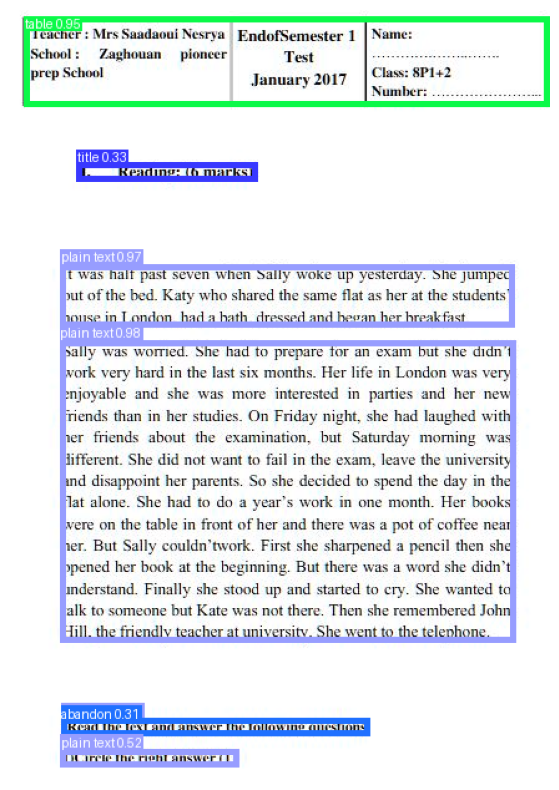

In [ ]:
image_path = '/content/drive/MyDrive/HandwritingRecog/english_1.png'
det_res = doc_str_model.predict(
    image_path,   # Image to predict
    imgsz=1024,   # Prediction image size
    conf=0.2,     # Confidence threshold
    device='cuda:0'  # Use GPU for inference
)

annotated_image = det_res[0].plot(pil=True, line_width=5, font_size=20)

img = Image.fromarray(annotated_image, 'RGB')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()



# Extract text segments

In [ ]:
original_img = cv2.imread(image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
text_segments = []

for detection in det_res[0].boxes:
    label = detection.cls
    if det_res[0].names[int(label)] == "plain text":
      x_min, y_min, x_max, y_max = map(int, detection.xyxy[0])

      cropped_text = original_img[y_min:y_max, x_min:x_max]

      # Convert to PIL Image
      text_img = Image.fromarray(cropped_text)
      text_segments.append(text_img)


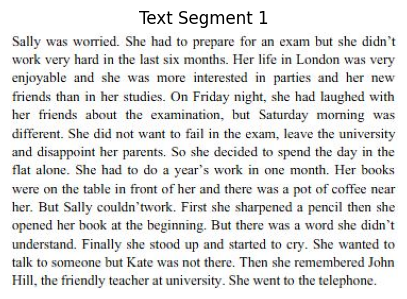

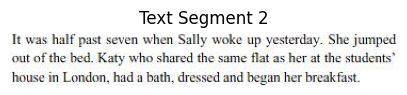

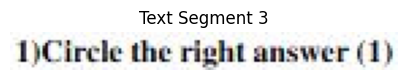

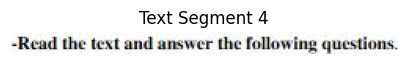

In [ ]:

# Step 5: Display the Extracted Text Segments
for i, img in enumerate(text_segments):
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Text Segment {i+1}")
    plt.show()


# Extract lines from text segment

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from PIL import Image

# --- Step 1: Preprocess a Single Image Segment with Padding and Normalization ---
def preprocess_image_with_padding(image_array, padding=20):
    """
    Convert an image to grayscale, normalize it, and add white padding.

    Args:
        image_array (numpy.ndarray): Input image as a NumPy array.
        padding (int): Number of white pixels to add as padding.

    Returns:
        numpy.ndarray: Preprocessed grayscale image with padding and normalization.
    """
    # Convert to grayscale if needed
    if len(image_array.shape) == 3:
        grayscale_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    else:
        grayscale_image = image_array  # Already grayscale

    # Normalize pixel values to range [0, 1] by dividing by 255
    normalized_image = grayscale_image / 255.0

    # Add white padding (1.0 represents white pixels in normalized range)
    padded_image = cv2.copyMakeBorder(
        normalized_image, padding, padding, 0, 0, cv2.BORDER_CONSTANT, value=1.0
    )

    return padded_image

# --- Step 2: Find Local Minima (Valleys) ---
def find_argmin_points(x, y):
    """
    Finds x-values where y-values have local minima (drops in signal).

    Args:
        x (np.ndarray): Array of x-values.
        y (np.ndarray): Array of y-values corresponding to x.

    Returns:
        list: List of x-values at which local minima occur.
    """
    minima_indices = (np.diff(np.sign(np.diff(y))) > 0).nonzero()[0] + 1  # Local minima indices
    separation_lines = [x[idx] for idx in minima_indices]

    # Ensure the first and last lines are included
    if len(separation_lines) == 0 or separation_lines[0] != 0:
        separation_lines.insert(0, 0)  # First line at top
    if separation_lines[-1] != x[-1]:
        separation_lines.append(x[-1])  # Last line at bottom

    return separation_lines

# --- Step 3: Split Image into Lines ---
def split_into_lines(image):
    """
    Split a preprocessed image into individual text lines using valley detection.
    """
    height, width = image.shape
    box_height = 9  # Sliding box height
    step = 3  # Step size

    all_steps_inf_content = []
    positions = []

    # Compute sum of pixel intensities per row
    for pos in range(0, height - box_height + 1, step):
        image_seg = image[pos : pos + box_height, :]
        sum_info_content = np.sum(image_seg)
        all_steps_inf_content.append(sum_info_content)
        positions.append(pos)

    # Convert lists to NumPy arrays
    np_positions = np.array(positions)
    np_all_steps_inf_content = np.array(all_steps_inf_content)

    # Smooth signal using Savitzky-Golay filter
    smoothed_signal = savgol_filter(np_all_steps_inf_content, window_length=11, polyorder=3)

    # Detect separation lines (valleys)
    separation_lines = find_argmin_points(np_positions, smoothed_signal)

    # Plot segmentation
    plt.figure(figsize=(10, 4))
    plt.plot(positions, all_steps_inf_content, label="Raw Signal")
    plt.plot(positions, smoothed_signal, label="Smoothed Signal", linewidth=2)
    for line in separation_lines:
        plt.axvline(line, color="red", linestyle="--", label="Detected Line" if line == separation_lines[0] else "")
    plt.legend()
    plt.show()

    # Extract and store segmented lines
    lines = []
    for idx in range(len(separation_lines) - 1):
        start, end = separation_lines[idx], separation_lines[idx + 1]
        line = image[start:end, :]
        lines.append(line)

    return lines


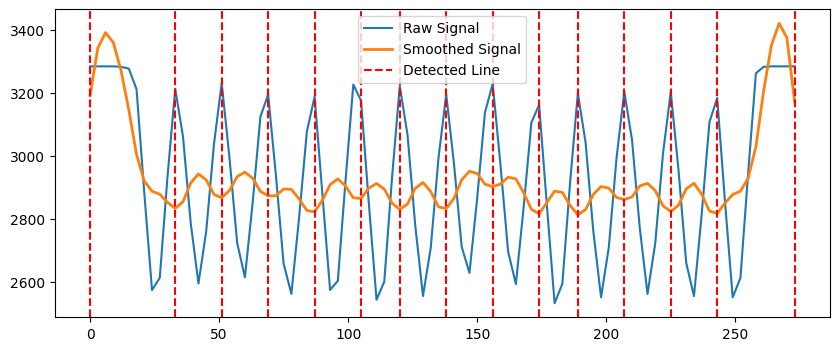

Shape of the second line: (18, 365)


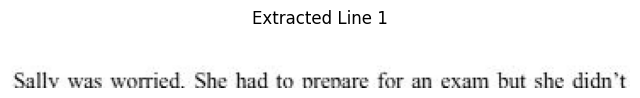

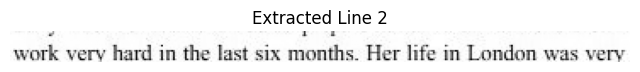

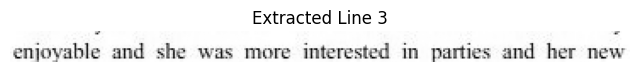

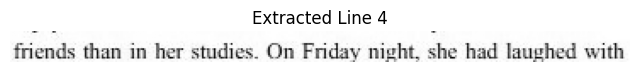

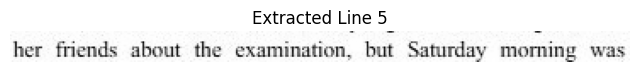

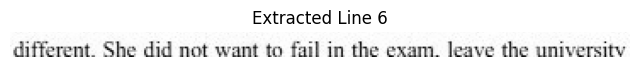

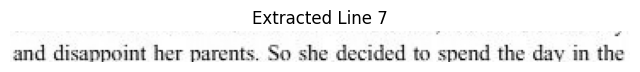

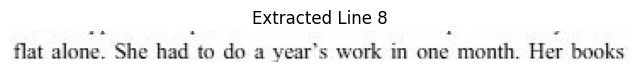

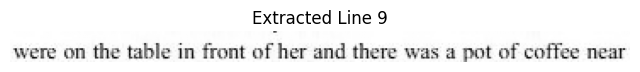

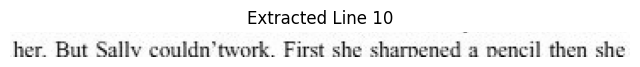

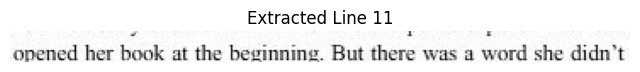

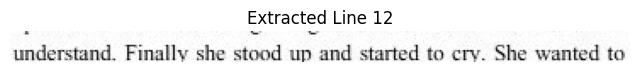

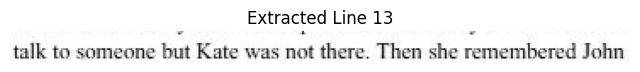

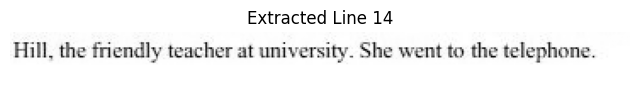

In [ ]:
# Convert PIL Image to NumPy array
np_img_seg = np.array(text_segments[0])  # Take the first extracted text segment

# Apply preprocessing with padding
post_img = preprocess_image_with_padding(np_img_seg, padding=20)

# Perform line segmentation
lines = split_into_lines(post_img)

# Check the shape of the second detected line
print("Shape of the second line:", lines[1].shape)

# Display the extracted lines
for i, line_img in enumerate(lines):
    plt.figure(figsize=(8, 2))
    plt.imshow(line_img, cmap="gray")
    plt.axis("off")
    plt.title(f"Extracted Line {i+1}")
    plt.show()


## Extract words

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d, gaussian_filter1d

def detect_vertical_spaces_with_separation_lines(line, box_widths=[5, 10, 15], threshold=0.20, smoothing_sigma=2):
    """
    Detects vertical spaces and plots the original image with gradient magnitudes and separation lines.

    Args:
        line (np.ndarray): 2D array representing the line image (grayscale).
        box_widths (list): List of box widths to average results over.
        threshold (float): Threshold for low gradient magnitude to detect spaces.
        smoothing_sigma (float): Standard deviation for Gaussian smoothing.

    Returns:
        list: Averaged positions of detected spaces.
        np.ndarray: Final smoothed gradient curve.
    """
    # Define the 1D gradient filter
    gradient_filter = np.array([-1, 1])

    # Apply the gradient filter horizontally
    horizontal_gradient = convolve1d(line, gradient_filter, axis=1, mode='reflect')
    gradient_magnitude = np.abs(horizontal_gradient)

    # Initialize the combined smoothed curve
    combined_smoothed_curve = np.zeros(gradient_magnitude.shape[1])

    for box_width in box_widths:
        # Compute the sliding box sum (average gradient magnitude in each window)
        box_sum = np.convolve(gradient_magnitude.sum(axis=0), np.ones(box_width), mode='valid') / box_width

        # Apply Gaussian smoothing to the gradient curve
        smoothed_box_sum = gaussian_filter1d(box_sum, sigma=smoothing_sigma)

        # Add the smoothed result to the combined curve
        combined_smoothed_curve[:len(smoothed_box_sum)] += smoothed_box_sum

    # Average the combined smoothed curve
    combined_smoothed_curve /= len(box_widths)


    minima_indices = (np.diff(np.sign(np.diff(combined_smoothed_curve))) > 0).nonzero()[0] + 1  # Indices of local maxima
    separ_lines = [idx for idx, minim_idx in enumerate(minima_indices)]
    np_separ_lines = np.array(separ_lines)

    # Find low-magnitude regions (spaces) based on the threshold
    low_magnitude_positions = np.where(combined_smoothed_curve < threshold)[0]
    #if low_magnitude_positions.shape[0] > 0:
    # Plot the results
    # fig, ax1 = plt.subplots(figsize=(16, 2))

    # # Plot the original image on the left y-axis
    # ax1.imshow(line, cmap='gray', aspect='auto')
    # ax1.set_title("Original Image with Gradient Magnitude and Word Boundaries")
    # ax1.set_xlabel("X Position")
    # ax1.set_ylabel("Y Position (Image)", color='black')
    # ax1.tick_params(axis='y', labelcolor='black')

    # # Add vertical separation lines at detected positions
    # for pos in low_magnitude_positions:
    #     ax1.axvline(x=pos, color='orange', linestyle='--', linewidth=1, label='Word Boundary' if pos == low_magnitude_positions[0] else None)

    # # Create the right y-axis for the gradient magnitude
    # ax2 = ax1.twinx()
    # ax2.plot(combined_smoothed_curve, color='blue', label='Averaged Gradient Magnitude (Sliding Window)')
    # ax2.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
    # ax2.scatter(low_magnitude_positions, combined_smoothed_curve[low_magnitude_positions], color='orange', label='Detected Spaces')
    # ax2.set_ylabel("Gradient Magnitude", color='blue')
    # ax2.tick_params(axis='y', labelcolor='blue')

    # # Add legends
    # ax2.legend(loc="upper right")
    # ax1.legend(loc="upper left")

    # plt.tight_layout()
    # plt.show()

    return low_magnitude_positions, combined_smoothed_curve


In [ ]:
def segment_image_from_positions(line, positions):
    """
    Segments an image into regions based on jumps in positions and plots the results.

    Args:
        line (np.ndarray): 2D array representing the line image (grayscale).
        positions (np.ndarray): Array of x-coordinates marking potential segment boundaries.

    Returns:
        list: List of segmented word images.
    """
    # Calculate differences between consecutive positions
    differences = np.diff(positions)

    # Identify jumps (differences > 1)
    jumps = differences > 1

    print(jumps)

    # Create the binary sequence to mark jumps
    binary_sequence = np.zeros(len(positions), dtype=int)
    binary_sequence[1:] = jumps.astype(int)  # Mark jumps as 1


    # Extract segment positions
    seg_pos = positions[np.argwhere(binary_sequence == 1)].flatten() + 2

    print(seg_pos)

    # Add start and end of the line to seg_pos
    seg_pos = np.insert(seg_pos, 0, 0)
    seg_pos = np.append(seg_pos, line.shape[1])

    # Crop the image into segments
    tiny_shift_pos = 3
    segments = []
    for idx, (start, end) in enumerate(zip(seg_pos[:-1], seg_pos[1:])):
        if idx < len(seg_pos) - 2:
          segments.append(line[:, start:end + tiny_shift_pos])

    # Plot the segments
    # fig, ax = plt.subplots(1, 1, figsize=(16, 1))
    # ax.imshow(line, cmap='gray', aspect='auto')
    # ax.set_title("Original Line Image with Segments")
    # ax.set_xlabel("X Position")
    # ax.set_ylabel("Y Position")

    # Add vertical lines to mark segment boundaries
    # for pos in seg_pos:
    #     ax.axvline(x=pos, color='orange', linestyle='--', linewidth=1)

    # Plot individual segments
    # plt.figure(figsize=(4, 10))
    # for i, segment in enumerate(segments):
    #     plt.subplot(len(segments), 1, i + 1)
    #     plt.imshow(segment, cmap='gray', aspect='auto')
    #     plt.axis('off')
    #     plt.title(f"Segment {i + 1}")
    # plt.tight_layout()
    # plt.show()

    return segments

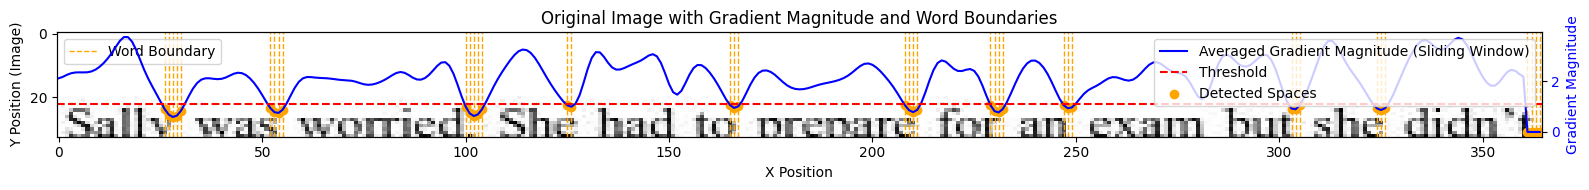

In [ ]:
line_idx = 0
positions, box_sum = detect_vertical_spaces_with_separation_lines(lines[line_idx], box_widths=[5], threshold=1.1)

[False False False False  True False False False  True False False False False  True False  True False False  True False False False  True False False False  True False False  True False False  True False False  True False False False]
[ 54 102 127 167 210 231 249 305 326 363]


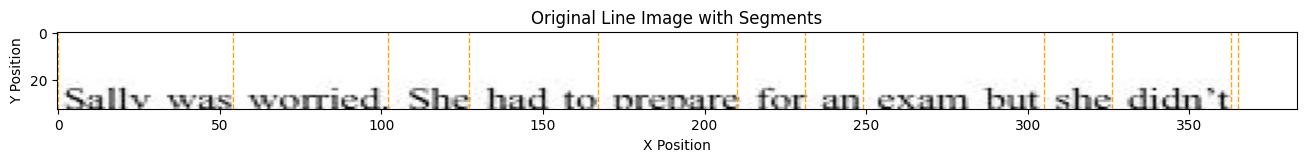

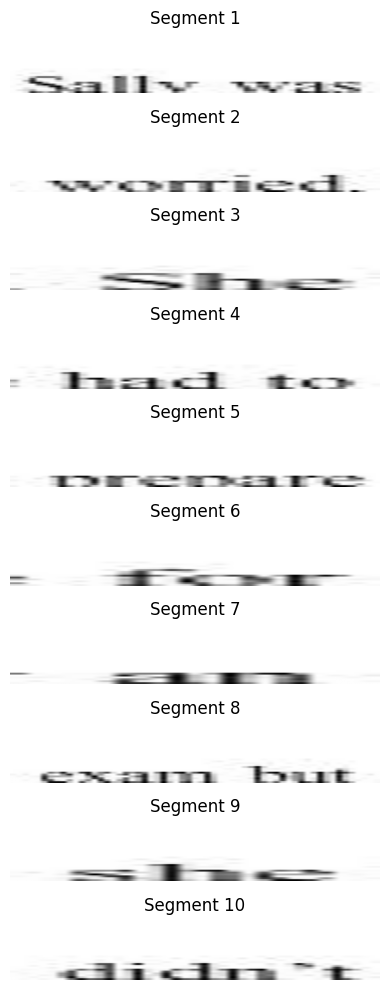

In [ ]:
segments = segment_image_from_positions(lines[line_idx], positions)

## Test extracting lines from hand written doc

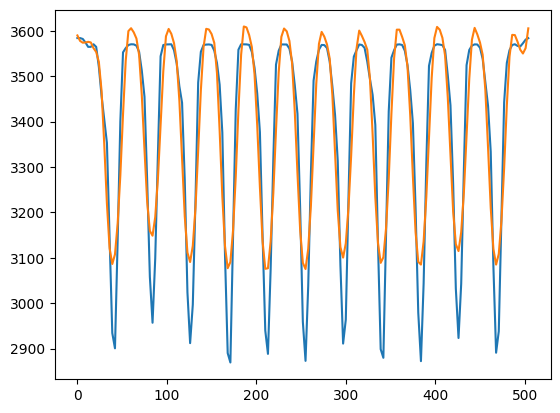

(42, 512)

In [ ]:
image_path = '/content/drive/MyDrive/HandwritingRecog/hand_writing_1.png'
image = preprocess_image(image_path)
_lines = split_into_lines(image)
_lines[1].shape

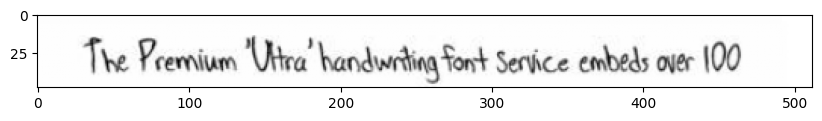

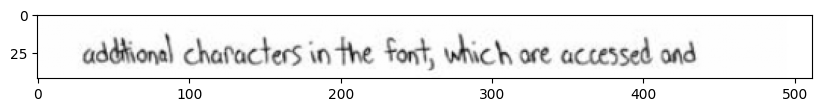

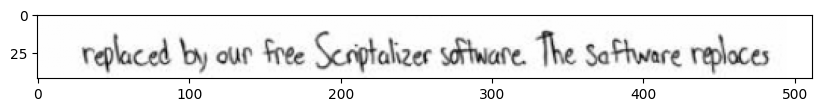

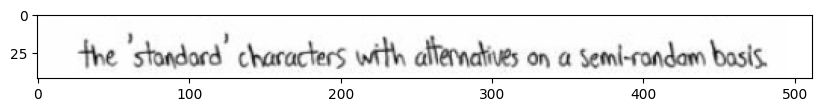

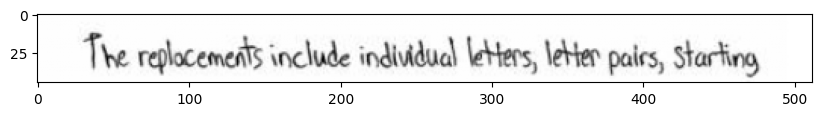

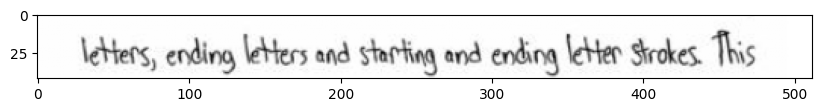

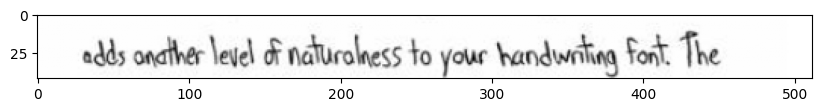

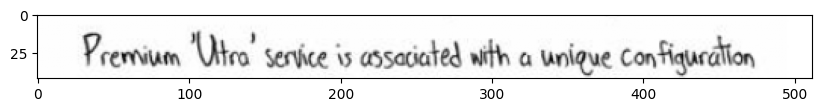

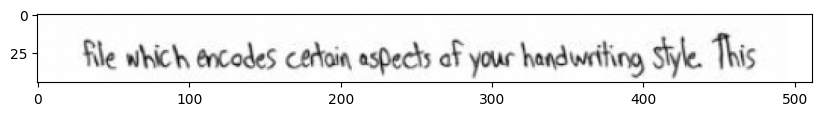

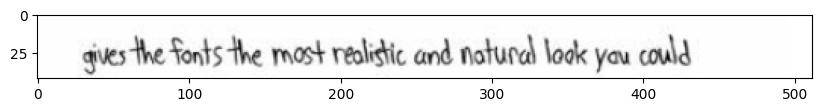

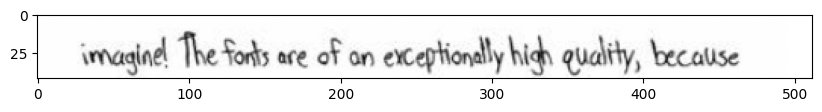

In [ ]:
import matplotlib.pyplot as plt

for idx, line in enumerate(lines):
    plt.figure(figsize=(10, 10))  # Adjust the figsize to make the plot bigger
    if len(line.shape) == 2:  # Grayscale image
        plt.imshow(line, cmap='gray')
    else:  # RGB image
        plt.imshow(line)
    plt.axis('on')
    plt.show()

# Use gradient magnitude to detect color variations

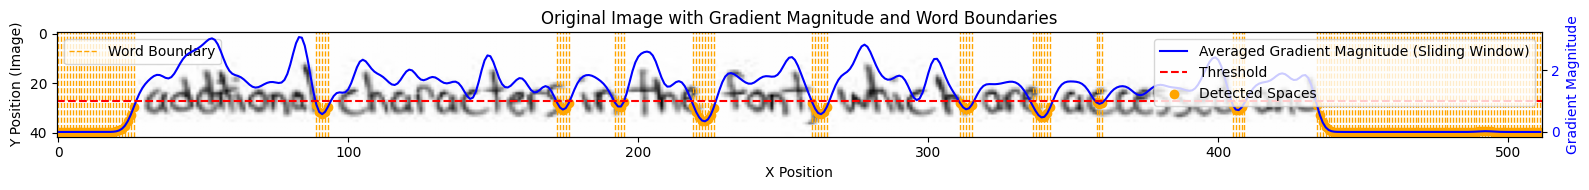

In [ ]:
line_idx = 1
positions, box_sum = detect_vertical_spaces_with_separation_lines(lines[line_idx], box_widths=[5], threshold=1)

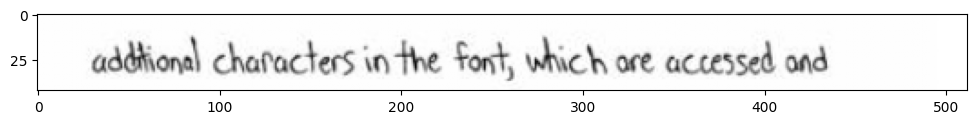

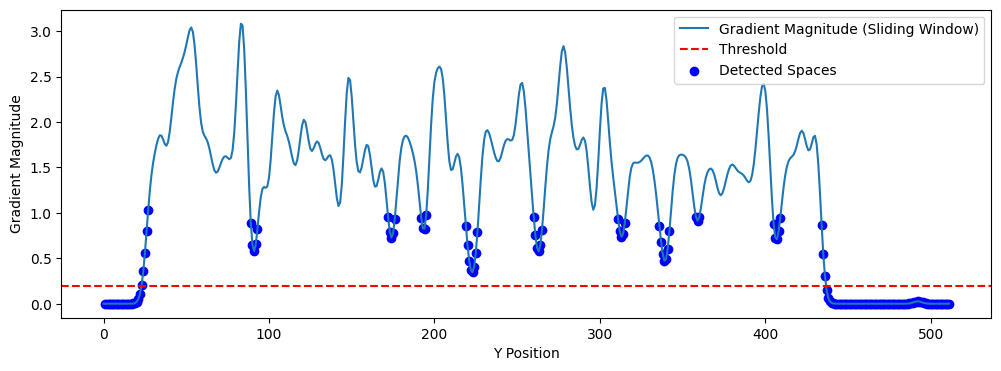

In [ ]:
# Display the results
from PIL import Image
image = Image.open(image_path).convert('L')
plt.figure(figsize=(12, 4))
plt.imshow(lines[line_idx], cmap='gray')
# plt.title("Original Image")
plt.axis('on')

# Plot the detected spaces
plt.figure(figsize=(12, 4))
plt.plot(box_sum, label='Gradient Magnitude (Sliding Window)')
plt.axhline(y=0.2, color='red', linestyle='--', label='Threshold')
plt.scatter(positions, box_sum[positions], color='blue', label='Detected Spaces')
plt.xlabel('Y Position')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.show()

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True False False False False
  True False False False  True False False False False False False False
  True False False False False False  True False False False False  True
 False False False False False False  True False False  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[ 89 172 192 219 260 311 336 358 405 434]


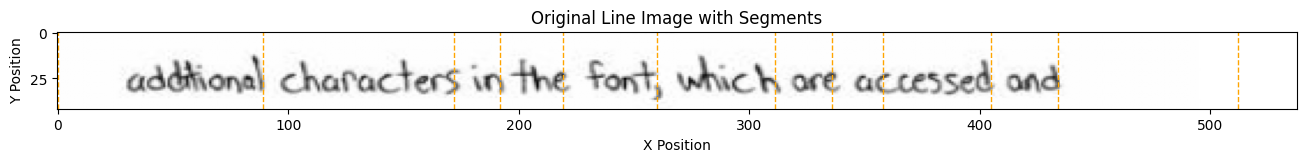

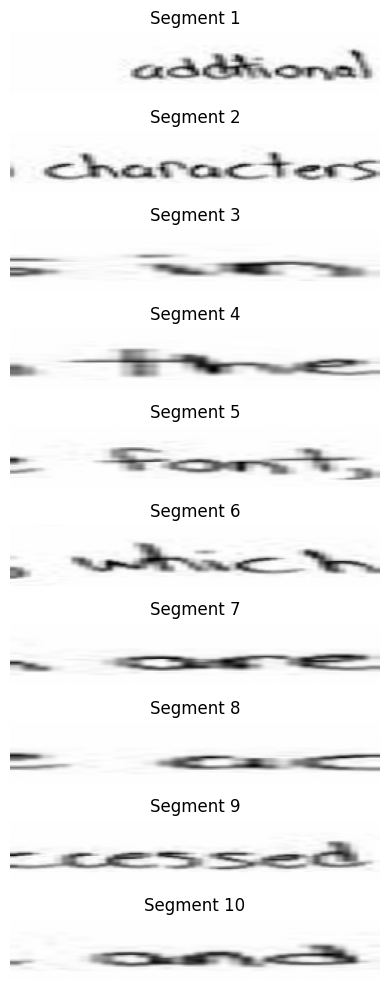

In [ ]:
segments = segment_image_from_positions(lines[line_idx], positions)

# Test Pretrained models

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

# Load the processor and the model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")



preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
model.eval()

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dens

In [ ]:
text  = ''
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
for line_idx, line in enumerate(lines):
  positions, box_sum = detect_vertical_spaces_with_separation_lines(lines[line_idx], box_widths=[5], threshold=1.1)
  segments = segment_image_from_positions(lines[line_idx], positions)
  for seg in segments:
    image_array = (seg * 255).astype(np.uint8)
    _word_image = Image.fromarray(image_array).convert("RGB")
    print(_word_image.size)
    pixel_values = processor(_word_image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    text += generated_text + ' '


[False False False False  True False False False  True False False False False  True False  True False False  True False False False  True False False False  True False False  True False False  True False False  True False False False]
[ 54 102 127 167 210 231 249 305 326 363]
(57, 33)
(51, 33)
(28, 33)
(43, 33)
(46, 33)
(24, 33)
(21, 33)
(59, 33)
(24, 33)
(39, 33)
[False False  True  True False False False  True False  True False False  True False False False False]
[160 203 250 335 362]
(163, 18)
(46, 18)
(50, 18)
(88, 18)
(30, 18)
[False False False False  True False False False  True False False False False False False  True False False False False  True False False False False  True False False False False  True False False False False  True False False False False False  True False  True False False False False False  True False False False
 False False]
[ 81 103 131 165 224 241 283 311 332 361]
(84, 18)
(25, 18)
(31, 18)
(37, 18)
(62, 18)
(20, 18)
(45, 18)
(31, 18)
(24, 18)
(32,

In [ ]:
text

"Sally was worried . She had to prepare for an exam but she didn't work very hard in the last six months . Her life . in London was very . enjoyable and she was more . interested . in parties . and her . new . friends than in her studies . On Friday . night , she had laughed . with . her friends . about . the examination , but Saturday . morning . was different . She did not want to fail in the exam . leave . the university . and disappointment her parents . So she decided to spend the day in the flat alone . she had to do . a year's . work . in one month . Her books . were on the table in front of her and there . was a pot of coffee . near her . But sally . couldn'twork . first she sharpened a pencil then she opened her book at the beginning . But there was a word she didn't understand . Finally she stood up and started to cry .  . She wanted to talk to someone but Kate was not there . Then she remembered John Hill , the friendly teacher at university . she went to the telephone . "